# Decision Trees and Random Forests

**In this Lecture we will be going over Decision Trees and Random Forests. In order for you to understand this lecture completely there is some required reading. First read my blog post [here](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411)**


After reading the blog post you should have a basic layman's (or laywoman!) understanding of how decision trees

In [2]:
#Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## Random Forest Classifier

Random forests are a classic example of an ensemble learner. As described in the blog posts random forests are an ensemble of many weak learners (decision trees).

Let's start by discussing Decision Trees themselves.

### Creating Decision Trees

We know from the blog posts that [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree) utilize binary splitting to make decisions based on features (the questions we asked). So lets go ahead and create some data using some built-in functions in SciKit-Learn:

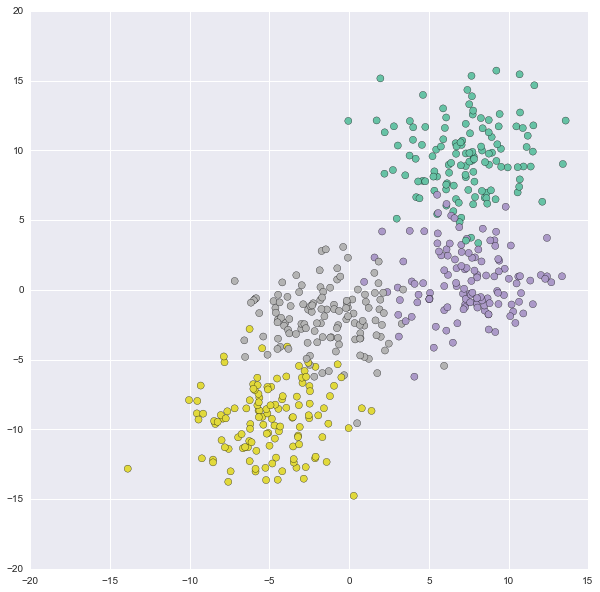

In [54]:
# from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4,
                  random_state=8, cluster_std=2.4)

#Scatter plot the points
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set2')

In [61]:
from sklearn.tree import DecisionTreeClassifier

Before we begin implementing the Decision Tree, lets create a nice function to plot out the decision boundaries using [mesh grid](http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) (a technique common to the Sci-Kit Learn documentation).

### Visualization Function

In [64]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='Set2')
    plt.clim(y.min(), y.max())

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set2')
    plt.axis('off')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = classifier.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

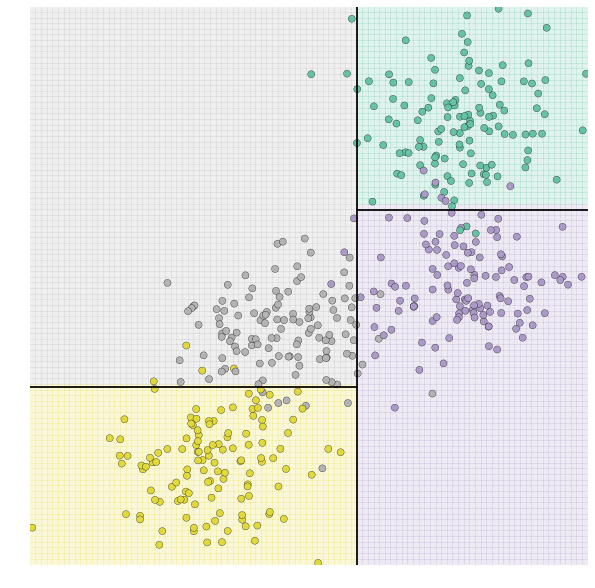

In [65]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

visualize_tree(clf,X,y)